In [107]:
library(ggplot2)
library(readr)
system_administrators <- read.csv("SystemAdministrators.csv")
names(system_administrators)


[1] "Experience"     "Training"       "Completed.task"

## Create a scatter plot of Experience versus Training using color or symbol to distinguish programmers who completed the task from those who did not complete it. Which predictor(s) appear(s) potentially useful for classifying task completion? 


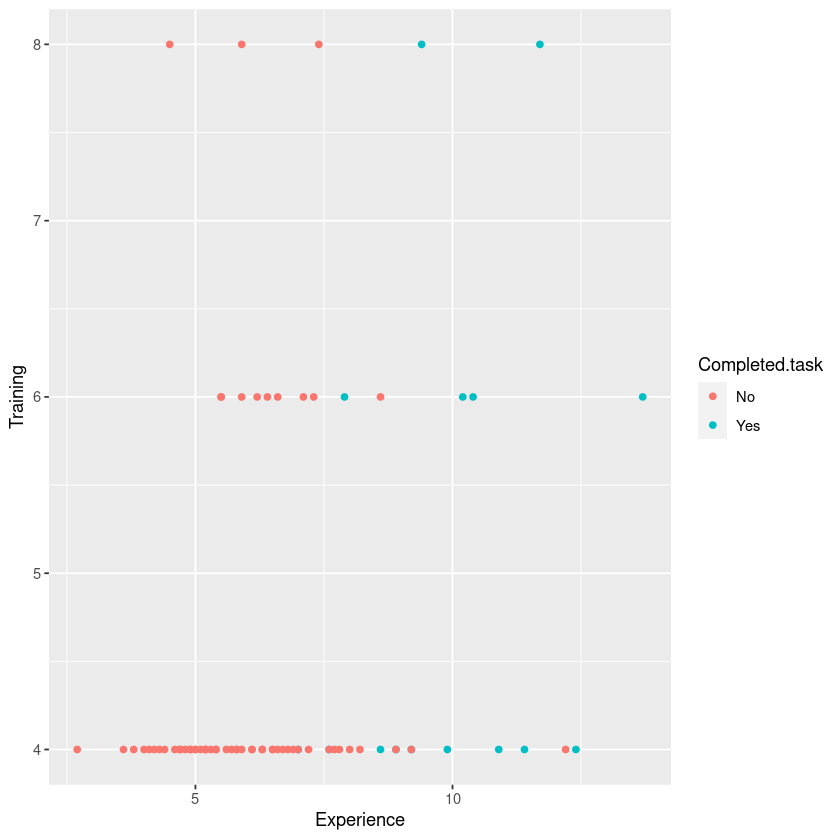

In [108]:
#scatter plot
p <- ggplot(system_administrators, aes(x=Experience, y=Training, color=Completed.task))
p + geom_point(alpha=1) +labs(color="Completed.task")
# The predictor that appears potentially useful for classifying task completion is - Experience and Training both seem useful

## Partition 80% of the data into a training set, and 20% into a validation set. When you sample for the training data, run set.seed(2) for reproducible samples.

## Use a classification tree to predict completed task with the two predictors, using the training set. Grow a large tree using the options: minbucket=1, cp=0.0001, and the default choices for other rpart() parameters. Plot the classification tree. 


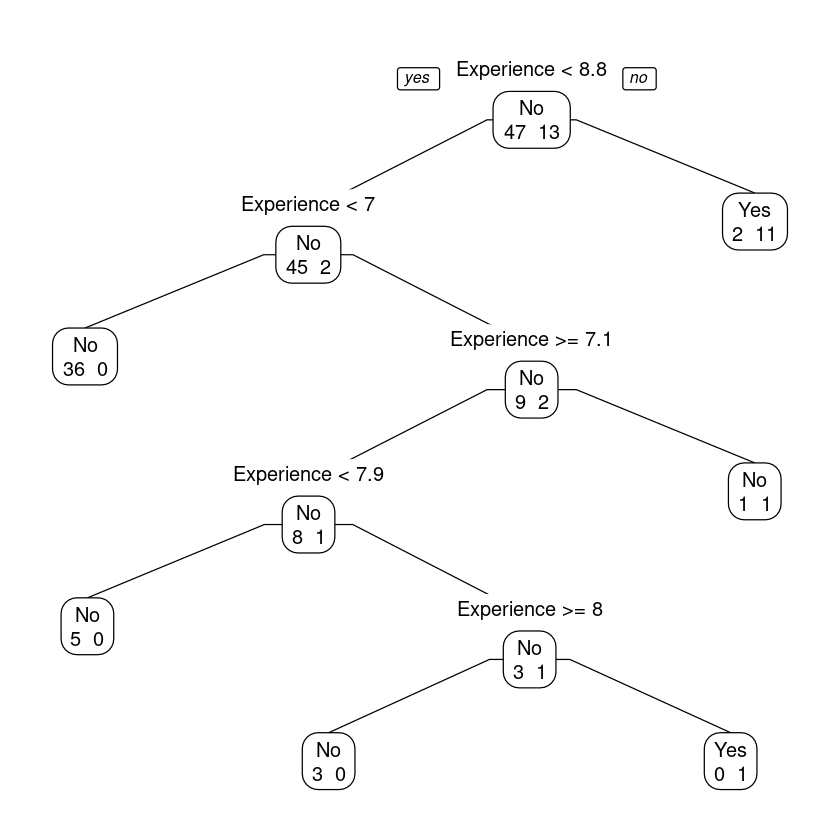

In [109]:
library(rpart)
library(rpart.plot)

set.seed(2)
train.index <- sample(1:nrow(system_administrators), size = 0.8 * nrow(system_administrators))
train.df <- system_administrators[train.index, ]
valid.df <- system_administrators[-train.index, ]

# classification tree
system_administrators_tree <- rpart(Completed.task ~ Experience + Training, data = train.df,method = "class", control = rpart.control(minbucket = 1, cp = 0.0001))
prp(system_administrators_tree, type = 1, extra = 1, split.font = 1, varlen = -10)


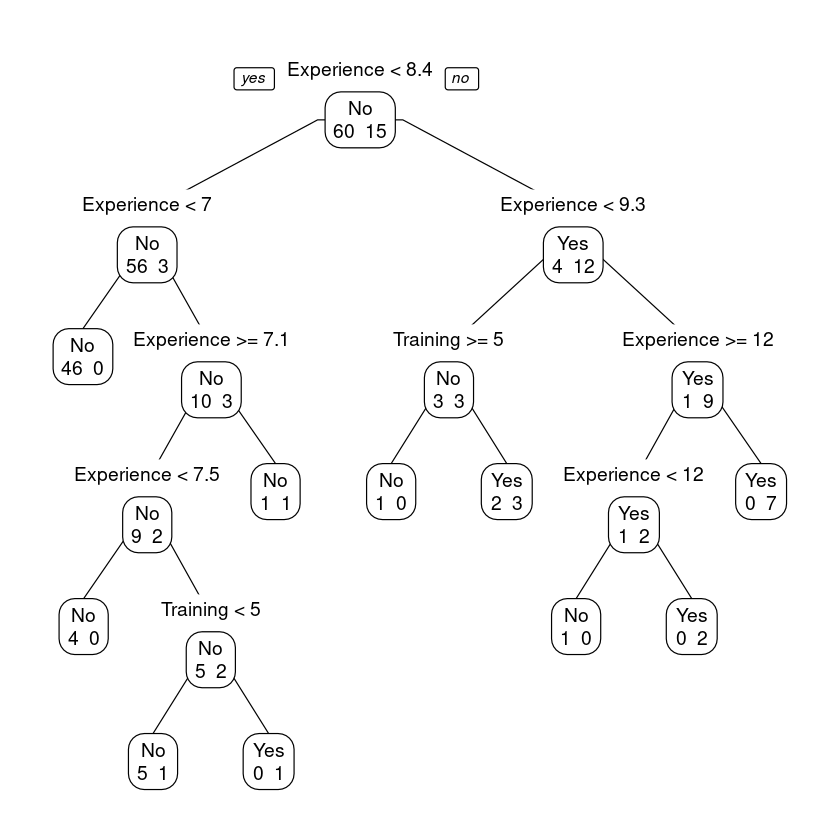

In [110]:

#full classification tree
system_administrators_tree_full <- rpart(Completed.task ~ Experience + Training, data = system_administrators, method = "class", control = rpart.control(minbucket = 1, cp = 0.0001))
prp(system_administrators_tree_full, type = 1, extra = 1, split.font = 1, varlen = -10)


## For the root node (top node of the tree plot), calculate its Gini index. 


0.32

## Which class will an administrator with Experience=8, and Training=6 be classified to based on the tree in part (2)?
- 

Yes

##  Do you think such a large tree in (2) will have good prediction accuracy for unseen data? 


In [111]:
prediction <- predict(system_administrators_tree_full, newdata = valid.df, type = "class")
confusionMatrix <- table(predicted = prediction, actual = valid.df$`Completed.task`)
accuracy <- sum(diag(confusionMatrix)) / sum(confusionMatrix)
list(ConfusionMatrix = confusionMatrix, Accuracy = accuracy)

# I think that  that a very large tree might not perform as well due to overfitting.

$ConfusionMatrix
         actual
predicted No Yes
      No  12   1
      Yes  1   1

$Accuracy
[1] 0.8666667


## Use 10-fold cross validation to determine the best value of complexity parameter (it controls the tree size). Before running cross validation, run set.seed(3). Use the options minbucket=1, cp=0.0001 for the biggest tree in cross validation.

In [112]:
set.seed(3)

cv_ct <- rpart(Completed.task ~ Experience + Training, data = system_administrators, method = "class", minsplit=2, cp=0.00001, xval=10, minbucket=1) # Using 10-fold cross-validation

printcp(cv_ct)


Classification tree:
rpart(formula = Completed.task ~ Experience + Training, data = system_administrators, 
    method = "class", minsplit = 2, cp = 0.00001, xval = 10, 
    minbucket = 1)

Variables actually used in tree construction:
[1] Experience Training  

Root node error: 15/75 = 0.2

n= 75 

        CP nsplit rel error  xerror    xstd
1 0.533333      0   1.00000 1.00000 0.23094
2 0.033333      1   0.46667 0.80000 0.21166
3 0.016667      5   0.33333 0.86667 0.21855
4 0.000010      9   0.26667 0.86667 0.21855


## What complexity parameter (cp) value minimizes the cross validation error in the cross validation? 


In [113]:
which.min(cv_ct$cptable[, "xerror"]) 
# Row 2 gives tge lowest error

2 
2

0.33333

## What complexity parameter (cp) leads to the “Best Pruned Tree” based on the cross validation? 

In [114]:
# The best pruned tree
# min(xerror) + 1xstd
# 0.80000+ 0.21166
which.max(cv_ct$cptable[, "xerror"] <=  0.80000+ 0.21166)

1 
1

Hence Row 1 is the top row within 1xstd of min(xerror) the cp in row 11 gives the "best pruned tree“ = 0.533333

## Plot the “Best Pruned Tree”

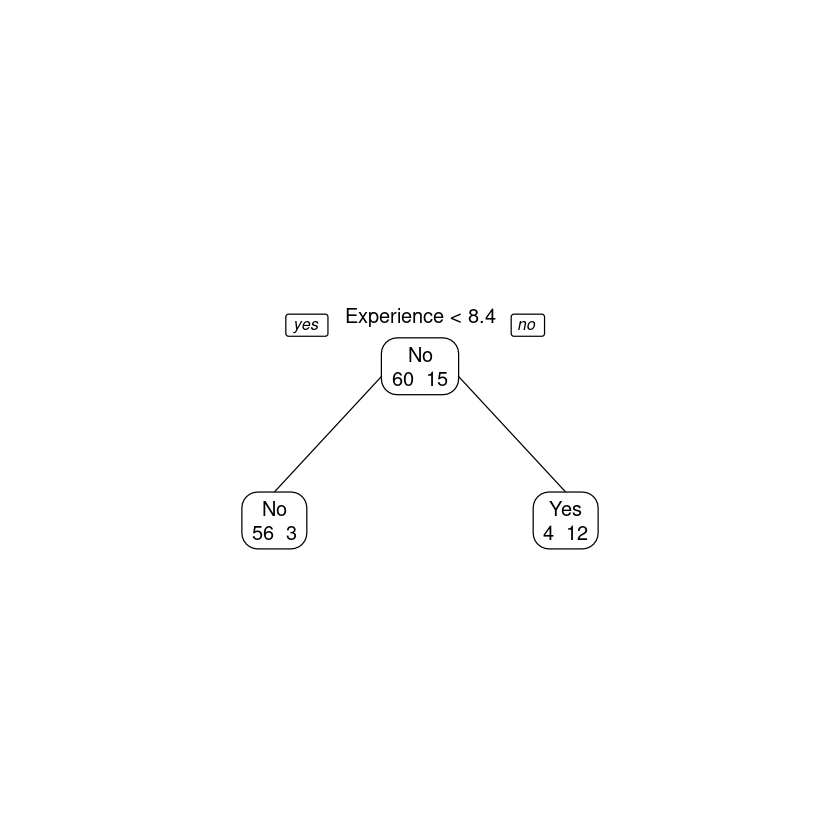

In [115]:
pruned.ct <- prune(cv_ct, cp = 0.533333)

# Plotting the pruned tree
prp(pruned.ct, type = 1, extra = 1, split.font = 1, varlen = -10)


## With the “best pruned tree” from the previous question, predict the outcomes in the validation data. Calculate the confusion matrix and the error rate.


In [116]:
predictions <- predict(pruned.ct, newdata = test_data, type = "class")
predictions


11  14  20  24  25  26  27  29  37  49  57  58  68  71  73 
Yes  No  No  No Yes  No  No  No  No  No  No  No  No  No  No 
Levels: No Yes

In [117]:
confusionMatrix <- table(Predicted = predictions, Actual = test_data$Completed.task)
confusionMatrix

         Actual
Predicted No Yes
      No  12   1
      Yes  1   1

In [118]:
errorRate <- 1 - sum(diag(confusionMatrix)) / sum(confusionMatrix)
errorRate

[1] 0.1333333

# PART 3 : Regression Tree

## Partition 60% of the data into a training set, and 40% into a validation set. When you sample for the training data, run set.seed(1) for reproducible samples. Use the training data to build a default regression tree to predict FARE with all the given variables. How many splits does the tree have? Plot the tree and attach the figure. 


In [119]:
set.seed(1)
data <- read.csv("Airfares-14vars.csv")
indexes <- sample(1:nrow(data), size = 0.6 * nrow(data))
train.df <- data[indexes, ]
valid.df <- data[-indexes, ]


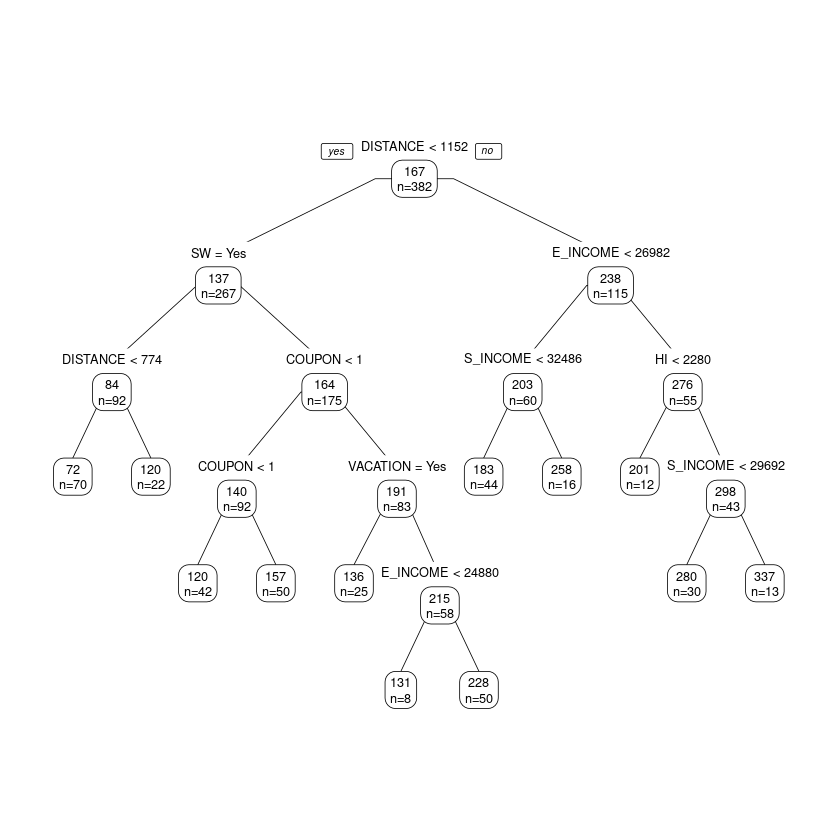

In [120]:
library(rpart)
tree_default <- rpart(FARE ~ ., data = train.df)
prp(tree_default, type = 1, extra = 1, split.font = 1, varlen = -10, digits=-1)

## Grow a big regression tree by setting cp=0.0001, with all other “rpart” parameters being the default values. How many splits does this tree have? You don’t have to attach this graph. 


This tree has 31 splits


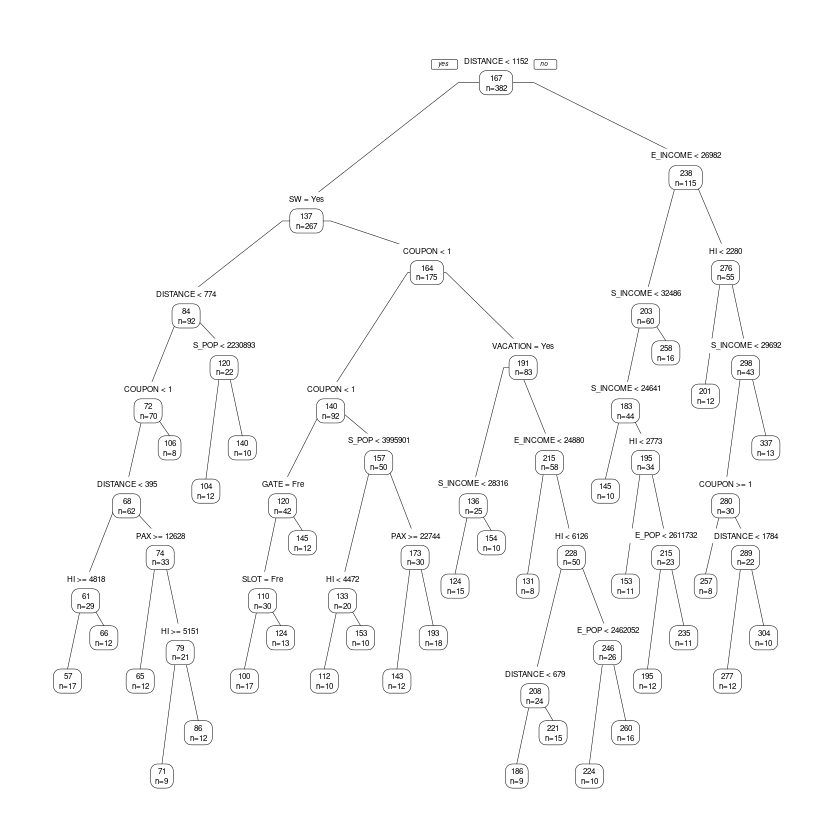

In [121]:
tree.rt <- rpart(FARE~., data = train.df, cp=0.0001)
prp(tree.rt , type = 1, extra = 1, split.font = 1, varlen = -10, digits=-1)

## Based on the tree model from the previous question, use 10-fold cross validation for determining the cp level. Run set.seed(1) before cross validation. Attach the cp table from the cross validation. What cp value leads to the “Best Pruned Tree”?


In [122]:

options(scipen=999)
printcp(tree.rt )
which.min(tree.rt$cptable[, "xerror"]) # row


Regression tree:
rpart(formula = FARE ~ ., data = train.df, cp = 0.0001)

Variables actually used in tree construction:
 [1] COUPON   DISTANCE E_INCOME E_POP    GATE     HI       PAX      S_INCOME
 [9] S_POP    SLOT     SW       VACATION

Root node error: 2387784/382 = 6250.7

n= 382 

           CP nsplit rel error  xerror     xstd
1  0.34815219      0   1.00000 1.00713 0.061711
2  0.16386757      1   0.65185 0.73993 0.043474
3  0.06423038      2   0.48798 0.51116 0.034523
4  0.04720873      3   0.42375 0.46428 0.031518
5  0.04472111      4   0.37654 0.39911 0.026842
6  0.03672200      5   0.33182 0.37198 0.026547
7  0.02779876      6   0.29510 0.34790 0.027191
8  0.02733564      7   0.26730 0.34066 0.026331
9  0.01612650      8   0.23996 0.32243 0.026826
10 0.01274871      9   0.22384 0.28868 0.024805
11 0.01207761     10   0.21109 0.27789 0.024477
12 0.00992689     11   0.19901 0.27536 0.024534
13 0.00820005     13   0.17916 0.26886 0.024451
14 0.00759207     14   0.17096 0.26615 0

27 
27

In [123]:
# The best Pruned Tree
#min(xerror) + 1xstd
# 0.23724 + 0.024500
#0.26174

which.max(tree.rt$cptable[, "xerror"] <= 0.23724 + 0.024500)

16 
16

In [124]:
# row 16 is the top row within 1xstd of min(xerror), the cp in row 16 gives the 'best pruned tree' = 0.00441659 

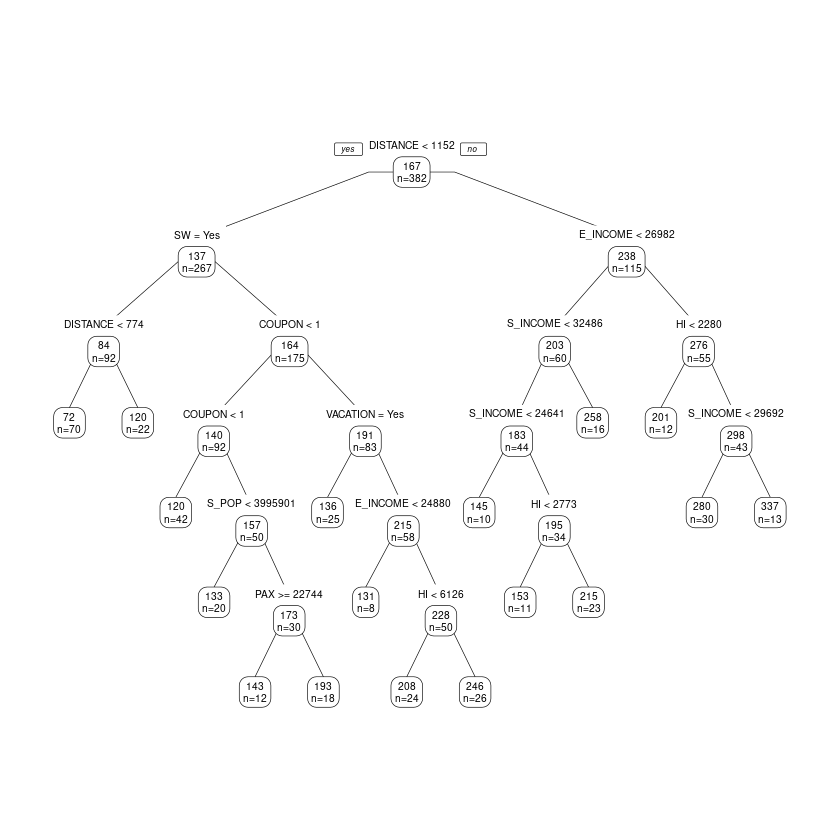

In [125]:
# best pruned tree
tree.rt.pruned <- prune(tree.rt, cp=tree.rt$cptable[
which.max(tree.rt$cptable[, "xerror"] <=
0.23724 + 0.024500),"CP"] )
prp(tree.rt.pruned, type = 1, extra = 1, split.font = 1,
varlen = -10, digits=-1)

## Apply the best pruned tree from the previous question to predict FARE of the validation data. Calculate the RMSE for the predictions.

In [126]:
# Evaluate the trees on validation data set
pred.pruned <- predict(tree.rt.pruned, valid.df)
pred.default <- predict(tree_default , valid.df)
pred.large <- predict(tree.rt, valid.df)
library(forecast)
pred.combined <- rbind(accuracy(pred.large, valid.df$FARE), accuracy(pred.pruned,
valid.df$FARE), accuracy(pred.default, valid.df$FARE))
rownames(pred.combined) = c("Large", "Best Pruned", "Default")
pred.combined

,ME,RMSE,MAE,MPE,MAPE
Large,-9.230957,43.75729,30.40906,-10.33789,21.47303
Best Pruned,-10.101588,44.73593,30.75892,-11.90254,22.48496
Default,-11.754691,45.81375,32.68559,-13.33112,23.76776
